TASK #10

In [ ]:
import pandas as pd
data = {'Product': ['A', 'B', 'C', 'D', 'E'],
        'Quantity': [10, 5, 8, 12, None],
        'Unit_Price': [20, 30, 25, 40, 35],
        'Region': ['North', 'South', None, 'East', 'West']}
pd.DataFrame(data).to_csv('sales_data.csv', index=False)
sales_df = pd.read_csv('sales_data.csv')
print(sales_df.head())
print(sales_df.describe())



print(sales_df.isnull().sum())
sales_df['Quantity'].fillna(sales_df['Quantity'].mean(), inplace=True)
sales_df.dropna(subset=['Region'], inplace=True)
print(sales_df)



  Product  Quantity  Unit_Price Region
0       A      10.0          20  North
1       B       5.0          30  South
2       C       8.0          25    NaN
3       D      12.0          40   East
4       E       NaN          35   West
        Quantity  Unit_Price
count   4.000000    5.000000
mean    8.750000   30.000000
std     2.986079    7.905694
min     5.000000   20.000000
25%     7.250000   25.000000
50%     9.000000   30.000000
75%    10.500000   35.000000
max    12.000000   40.000000
Product       0
Quantity      1
Unit_Price    0
Region        1
dtype: int64
  Product  Quantity  Unit_Price Region
0       A     10.00          20  North
1       B      5.00          30  South
3       D     12.00          40   East
4       E      8.75          35   West


/tmp/ipython-input-1871397979.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sales_df['Quantity'].fillna(sales_df['Quantity'].mean(), inplace=True)


TASK # 11

In [23]:


import pandas as pd

# Dummy customer data
customers_data = {
    'CustomerID': [1, 2, 3],
    'CustomerName': ['Alice', 'Bob', 'Charlie']
}

customers_df = pd.DataFrame(customers_data)
customers_df.to_csv('clean_sales.csv', index=False)
print("customers.csv created!")





# Dummy orders data
orders_data = {
    'OrderID': [101, 102, 103, 104],
    'CustomerID': [1, 2, 1, 3],
    'Amount': [250, 150, 300, 400]
}

orders_df = pd.DataFrame(orders_data)
orders_df.to_csv('clean_sales.xlsx', index=False)
print("orders.csv created!")



import pandas as pd

# Read both CSV files
customers = pd.read_csv("customers.csv")
orders = pd.read_csv("orders.csv")

# Merge on CustomerID
data = pd.merge(customers, orders, on="CustomerID")

# Calculate total spending
result = data.groupby("CustomerName")["Amount"].sum()

print(result)





customers.csv created!
orders.csv created!
CustomerName
Alice      550
Bob        150
Charlie    400
Name: Amount, dtype: int64


In [21]:
employees = [
    {"id": 1, "name": "Alice", "department": "HR"},
    {"id": 2, "name": "Bob", "department": "Finance"},
    {"id": 3, "name": "Charlie", "department": "IT"}]
pd2=pd.DataFrame(employees).to_json('employee_records.json', orient='records', indent=4)
employee_df = pd.read_json('employee_records.json')
print(employee_df)
# print(pd2);

   id     name department
0   1    Alice         HR
1   2      Bob    Finance
2   3  Charlie         IT


In [22]:
import xml.etree.ElementTree as ET
xml_content = """<?xml version="1.0"?>
<products>
    <product><name>Keyboard</name><price>500</price></product>
    <product><name>Mouse</name><price>300</price></product>
    <product><name>Monitor</name><price>8000</price></product>
</products>"""
with open("products.xml", "w") as f:
    f.write(xml_content)
tree = ET.parse('products.xml')
root = tree.getroot()
products_list = [{'Product': p.find('name').text, 'Price': float(p.find('price').text)} for p in root.findall('product')]
products_df = pd.DataFrame(products_list)
print(products_df)


    Product   Price
0  Keyboard   500.0
1     Mouse   300.0
2   Monitor  8000.0


task #12

In [30]:
import pandas as pd

# Step 1: Create sales_df
sales_data = {
    'Product': ['A', 'B', 'C', 'D', 'E'],
    'Quantity': [10, 5, 8, 12, 10],
    'Unit_Price': [2, 3, 5, 4, 3],
    'Region': ['North', 'South', 'East', 'East', 'West'],
}

sales_df = pd.DataFrame(sales_data)
sales_df['Total_Price'] = sales_df['Quantity'] * sales_df['Unit_Price']

# Step 2: Create region_sales by summing Total_Price per region
region_sales = sales_df.groupby('Region')['Total_Price'].sum().reset_index()

# Step 3: Save to Excel with 2 sheets
with pd.ExcelWriter('Sales_Report.xlsx') as writer:
    sales_df.to_excel(writer, sheet_name='Sales', index=False)
    region_sales.to_excel(writer, sheet_name='RegionTotals', index=False)

print("Excel file 'Sales_Report.xlsx' created with 2 sheets!")


Excel file 'Sales_Report.xlsx' created with 2 sheets!


In [31]:
import pandas as pd

# Use ExcelWriter to write multiple sheets
with pd.ExcelWriter('report.xlsx') as writer:
    sales_df.to_excel(writer, sheet_name='Sales', index=False)        # Sheet 1
    region_sales.to_excel(writer, sheet_name='RegionTotals', index=False)  # Sheet 2


In [34]:
# Filter rows where Total_Price > 10
filtered = sales_df[sales_df['Total_Price'] > 5]

# Sort the filtered data by Quantity
sorted_data = filtered.sort_values('Quantity')

print(sorted_data)


  Product  Quantity  Unit_Price Region  Total_Price
1       B         5           3  South           15
2       C         8           5   East           40
0       A        10           2  North           20
4       E        10           3   West           30
3       D        12           4   East           48


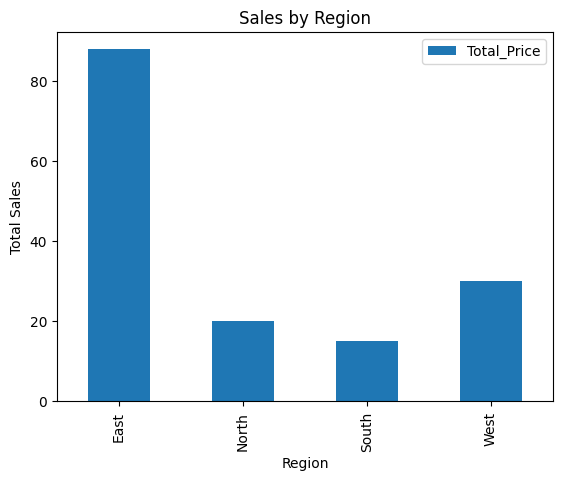

In [35]:
import matplotlib.pyplot as plt

# Create bar chart
region_sales.plot(kind='bar', x='Region', y='Total_Price')

# Add labels and title
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.title('Sales by Region')

# Show the chart
plt.show()


In [37]:
import sqlite3

# 1️⃣ Save as CSV
sales_df.to_csv('FinalReport.csv', index=False)

# 2️⃣ Save as JSON
sales_df.to_json('FinalReport.json', orient='records', indent=4)

# 3️⃣ Save in SQL database
conn = sqlite3.connect('FinalReport.db')           # Create SQLite database
sales_df.to_sql('FinalReport', conn, if_exists='replace', index=False)  # Save DataFrame as table
conn.close()  # Close the connection
